@author: Miguel V. Martin for the ML corse, adapted from Geron

In [ ]:
import pandas as pd, numpy as np
from numpy import argmax
from numpy import unique
import matplotlib.pyplot as plt, seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import RFE
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import tensorflow as tf
from tensorflow import keras
from sklearn.preprocessing import StandardScaler

# Dataset Loading

In [ ]:
# Placing URL for getting the dataset from the website 
url_link = 'http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data'
col_names = ['MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight',
                'Acceleration', 'Model Year', 'Origin']
df = pd.read_csv(url_link, names=col_names, na_values='?', comment='\t', sep=' ', skipinitialspace=True)
print(df)

      MPG  Cylinders  Displacement  Horsepower  Weight  Acceleration  \
0    18.0          8         307.0       130.0  3504.0          12.0   
1    15.0          8         350.0       165.0  3693.0          11.5   
2    18.0          8         318.0       150.0  3436.0          11.0   
3    16.0          8         304.0       150.0  3433.0          12.0   
4    17.0          8         302.0       140.0  3449.0          10.5   
..    ...        ...           ...         ...     ...           ...   
393  27.0          4         140.0        86.0  2790.0          15.6   
394  44.0          4          97.0        52.0  2130.0          24.6   
395  32.0          4         135.0        84.0  2295.0          11.6   
396  28.0          4         120.0        79.0  2625.0          18.6   
397  31.0          4         119.0        82.0  2720.0          19.4   

     Model Year  Origin  
0            70       1  
1            70       1  
2            70       1  
3            70       1  
4    

In [ ]:
df.isnull().sum()

MPG             0
Cylinders       0
Displacement    0
Horsepower      6
Weight          0
Acceleration    0
Model Year      0
Origin          0
dtype: int64

In [ ]:
# Dropping the last two columns Origin and Car Names by using iloc
df.drop(df.iloc[:,7:8], inplace=True, axis=1)
print(df)

      MPG  Cylinders  Displacement  Horsepower  Weight  Acceleration  \
0    18.0          8         307.0       130.0  3504.0          12.0   
1    15.0          8         350.0       165.0  3693.0          11.5   
2    18.0          8         318.0       150.0  3436.0          11.0   
3    16.0          8         304.0       150.0  3433.0          12.0   
4    17.0          8         302.0       140.0  3449.0          10.5   
..    ...        ...           ...         ...     ...           ...   
393  27.0          4         140.0        86.0  2790.0          15.6   
394  44.0          4          97.0        52.0  2130.0          24.6   
395  32.0          4         135.0        84.0  2295.0          11.6   
396  28.0          4         120.0        79.0  2625.0          18.6   
397  31.0          4         119.0        82.0  2720.0          19.4   

     Model Year  
0            70  
1            70  
2            70  
3            70  
4            70  
..          ...  
393      

In [ ]:
# Attribute horsepower has 6 missing values. For filling these up with the average horsepower for the respective number of cylinders I have used the mean value. 
mean_value = df['Horsepower'].mean()
print('Mean of values in horsepower :')
print(mean_value)

Mean of values in horsepower :
104.46938775510205


In [ ]:
# Replacing missing attributes from the horsepower column with the mean value. 
df['Horsepower'].fillna(value=df['Horsepower'].mean(), inplace=True)
print('Updated Dataframe:')
print(df)

Updated Dataframe:
      MPG  Cylinders  Displacement  Horsepower  Weight  Acceleration  \
0    18.0          8         307.0       130.0  3504.0          12.0   
1    15.0          8         350.0       165.0  3693.0          11.5   
2    18.0          8         318.0       150.0  3436.0          11.0   
3    16.0          8         304.0       150.0  3433.0          12.0   
4    17.0          8         302.0       140.0  3449.0          10.5   
..    ...        ...           ...         ...     ...           ...   
393  27.0          4         140.0        86.0  2790.0          15.6   
394  44.0          4          97.0        52.0  2130.0          24.6   
395  32.0          4         135.0        84.0  2295.0          11.6   
396  28.0          4         120.0        79.0  2625.0          18.6   
397  31.0          4         119.0        82.0  2720.0          19.4   

     Model Year  
0            70  
1            70  
2            70  
3            70  
4            70  
..      

In [ ]:
df['Horsepower'].describe

<bound method NDFrame.describe of 0      130.0
1      165.0
2      150.0
3      150.0
4      140.0
       ...  
393     86.0
394     52.0
395     84.0
396     79.0
397     82.0
Name: Horsepower, Length: 398, dtype: float64>

In [ ]:
df.isnull().sum()

MPG             0
Cylinders       0
Displacement    0
Horsepower      0
Weight          0
Acceleration    0
Model Year      0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MPG           398 non-null    float64
 1   Cylinders     398 non-null    int64  
 2   Displacement  398 non-null    float64
 3   Horsepower    398 non-null    float64
 4   Weight        398 non-null    float64
 5   Acceleration  398 non-null    float64
 6   Model Year    398 non-null    int64  
dtypes: float64(5), int64(2)
memory usage: 21.9 KB


# Dataset Split

In [ ]:
# Splitting dataset into train and test set
train, test = train_test_split(df, test_size=0.5, random_state=42)
train_labels = train.iloc[:,-1]
train_data = train.drop(['MPG'], axis=1)
test_labels = test.iloc[:,-1]
test_data = test.drop(['MPG'], axis=1)

In [ ]:
# For multiclass classification, we will use 'MPG' as the target
train_labels_mc = train['MPG']
test_labels_mc = test['MPG']

In [ ]:
# Using StandardScaler so that it can removes the mean and scales each feature or variable to unit variance
scaler = StandardScaler()
train_data = scaler.fit_transform(train_data)
test_data = scaler.transform(train_data)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  "X does not have valid feature names, but"


# Random Forest (RandomForestRegressor)

In [ ]:
# Reference: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html 
# Initializing a Random Forest Regressor
rf_reg = RandomForestRegressor(n_estimators=140, max_depth=5, random_state=42)

In [ ]:
# Train model on training data
rf_reg.fit(train_data, test_data)

RandomForestRegressor(max_depth=5, n_estimators=140, random_state=42)

In [ ]:
# Making predictions using trained model
y_pred_rf = rf_reg.predict(test_data)

In [ ]:
# Model metrics:
mse = mean_squared_error(test_data, y_pred_rf)
mae = mean_absolute_error(test_data, y_pred_rf)
r2s = r2_score(test_data, y_pred_rf)

In [ ]:
print(mse)

0.17142441056433988


In [ ]:
print(mae)

0.21489364782159057


In [ ]:
# Showing both mse and mae of Random Forest Regression Model
print("\n\nRandom Forest Regression Model Metrics:")
print("MSE = {0:.4f}, MAE = {1:.4f} & R2-Score = {2:.4f}\n\n".format(mse, mae, r2s))



Random Forest Regression Model Metrics:
MSE = 0.1714, MAE = 0.2149 & R2-Score = -0.7462




In [ ]:
# Using 5-Fold Cross-Validation-
cvs = cross_val_score(rf_reg, train_data, test_data, cv = 5)
print("\nRandom Forest Regressor By Cross Validation (5-fold CV):")
print("Mean = {0:.4f} & Standard deviation = {1:.4f}\n".format(cvs.mean(), cvs.std()))


Random Forest Regressor By Cross Validation (5-fold CV):
Mean = 0.8916 & Standard deviation = 0.0044



# Configuration of Neural Network 

In [ ]:
# Reference: https://machinelearningmastery.com/tutorial-first-neural-network-python-keras/ 
# Sequential Model
model = keras.models.Sequential([
keras.layers.Flatten(input_shape=[7]),
keras.layers.Dense(100, activation="relu", kernel_initializer="HeNormal"),
keras.layers.Dense(1, activation="elu"),
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 7)                 0         
                                                                 
 dense (Dense)               (None, 100)               800       
                                                                 
 dense_1 (Dense)             (None, 1)                 101       
                                                                 
Total params: 901
Trainable params: 901
Non-trainable params: 0
_________________________________________________________________


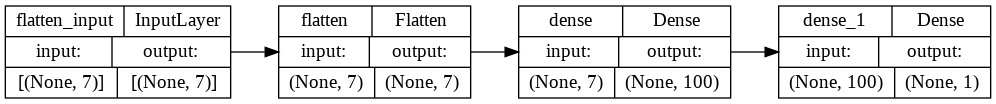

In [ ]:
# Reference: https://www.tensorflow.org/api_docs/python/tf/keras/utils/to_categorical 
# Building model as depicted in the paper
keras.utils.plot_model(model, "auto-mpg-prediction-model.png", show_shapes=True, rankdir='LR') 